In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# Normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [5]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

C:\Users\USER\anaconda3\ANACONDA22\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 32ms/step - accuracy: 0.6948 - loss: 0.8537 - val_accuracy: 0.8627 - val_loss: 0.3807
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8531 - loss: 0.4156 - val_accuracy: 0.8728 - val_loss: 0.3391
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8686 - loss: 0.3621 - val_accuracy: 0.8842 - val_loss: 0.3030
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.8831 - loss: 0.3257 - val_accuracy: 0.8923 - val_loss: 0.2865
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8895 - loss: 0.3051 - val_accuracy: 0.9009 - val_loss: 0.2682
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.8980 - loss: 0.2825 - val_accuracy: 0.9038 - val_loss: 0.2613
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9034 - loss: 0.2652 - val_accuracy: 0.9078 - val_loss: 0.2494
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9099 - loss: 0.2417 - 

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9088 - loss: 0.2663
Test accuracy: 0.9064000248908997


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


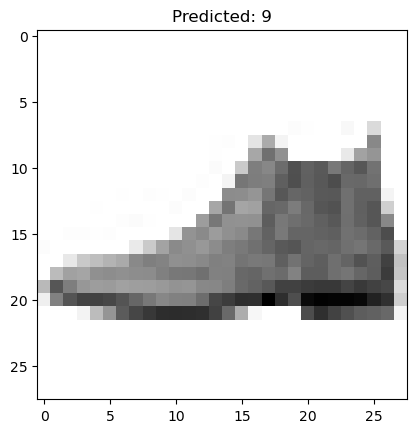

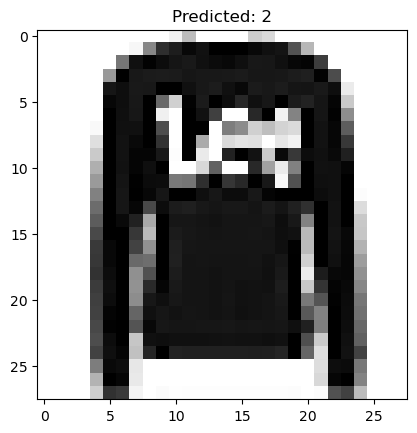

In [10]:

# Make predictions on two images
predictions = model.predict(test_images[:2])

# Display the images and predictions
for i in range(2):
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'Predicted: {np.argmax(predictions[i])}')
    plt.show()
